# ProB and Jupyter for Logic, Set Theory, Theoretical Computer Science and Formal Methods

### David Geleßus, Michael Leuschel
### ABZ 2021

https://gitlab.cs.uni-duesseldorf.de/general/stups/prob2-jupyter-kernel

![ProB](./img/prob_logo.png)

# Intro: Notebooks, Jupyter

## What is a Notebook?

* Document containing text and executable code blocks
* Code can be executed interactively
* Results are shown in the notebook below the corresponding code
* Similar to a REPL (read-eval-print-loop), with some differences:
    * Code blocks can be edited and executed out-of-order
    * Results can contain rich text and graphics
    * Notebooks are saved as a file
    * Code can be re-executed later
    * Can be shared with other users
* Implementations: Mathematica, Maple, Jupyter, others

## Jupyter Notebook

* Browser-based notebook interface
* Open-source and cross-platform
* Originated in the Python community, implemented in Python
* Also supports languages other than Python
* Language integration provided by a separate *kernel*
* Kernels: Python, Julia, Java, B, others

## ProB (https://prob.hhu.de/w/)

* Animation, verification and visualisation tool for formal specifications
* Based on a solver for predicate logic, arithmetic, set theory
* Supports mainly B specifications (classical B, Event-B)
* Also understands some other formalisms, e.g. TLA<sup>+</sup> and Z

# Features

## Evaluating Formulas

Evaluating B expressions and solving predicates:

In [1]:
1 + 2

$3$

In [2]:
1 + x = 3

$\mathit{TRUE}$

**Solution:**
* $\mathit{x} = 2$

In [3]:
1..5 \/ {-3, 4, 10, 18}

$\{-3,1,2,3,4,5,10,18\}$

Example: Set of all prime numbers < 500

In [4]:
{x | x > 1 & x < 500 & not(#y.(y > 1 & y < x & x mod y = 0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499\}$

Outputs are rendered as $\LaTeX$ formulas:

In [5]:
:prettyprint x > 1 & x < 500 & not(#y.(y > 1 & y < x & x mod y = 0))

x > 1 ∧ x < 500 ∧ ¬(∃y·(y > 1 ∧ y < x ∧ x mod y = 0))

Unicode symbols can also be used in inputs:

In [6]:
{x | x>1 ∧ x<500 ∧ ¬(∃y.(y>1 ∧ y<x ∧ x mod y=0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499\}$

Convenient multiline input, with syntax highlighting and code completion:

In [7]:
:table {S,E,N,D,M,O,R,Y |

{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

}

|S|E|N|D|M|O|R|Y|
|---|---|---|---|---|---|---|---|
|$9$|$5$|$6$|$7$|$1$|$0$|$8$|$2$|


## Visualisation

In B, sequences are also functions, functions are relations, and relations are sets.
Relations can be displayed visually:

In [8]:
{x,y | x:1..5 & y:1..5 & x>y}

$\{(2\mapsto 1),(3\mapsto 1),(3\mapsto 2),(4\mapsto 1),(4\mapsto 2),(4\mapsto 3),(5\mapsto 1),(5\mapsto 2),(5\mapsto 3),(5\mapsto 4)\}$

In [9]:
:pref DOT_ENGINE=circo

Preference changed: DOT_ENGINE = circo


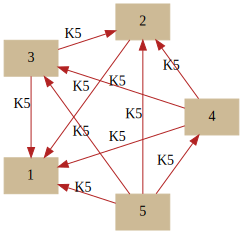

In [10]:
:dot expr_as_graph ("K5", {x,y | x:1..5 & y:1..5 & x>y})

## Working with Machines

In [11]:
MACHINE Lift
VARIABLES curfloor
INVARIANT curfloor : 1..5
INITIALISATION curfloor := 1
OPERATIONS
    up = PRE curfloor <= 5 THEN curfloor := curfloor + 1 END;
    down = PRE curfloor > 1 THEN curfloor := curfloor - 1 END
END

Loaded machine: Lift

In [12]:
:init

Executed operation: INITIALISATION()

Expressions are evaluated in the current state of the machine.

In [13]:
curfloor

$1$

In [14]:
:exec up

Executed operation: up()

In [15]:
curfloor

$2$

In [16]:
:modelcheck

0.037 sec, 7 of 7 states processed, 11 transitions

Model check uncovered an error: Invariant violation found.
Use :trace to view the trace to the error state.

In [17]:
:trace

* -1: Root state
* 0: `INITIALISATION()`
* 1: `up()`
* 2: `up()`
* 3: `up()`
* 4: `up()`
* 5: `up()` **(current)**

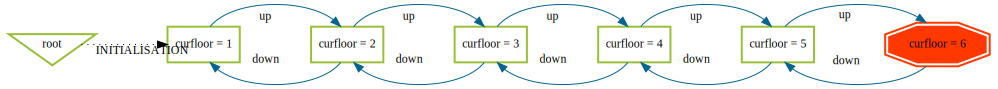

In [18]:
:dot state_space

# Applications

## Interactive Development

* Any part of a notebook can be edited and re-executed
* Simplifies testing changes to the code, e.g.:
    * Changing the values of constants and preferences
    * Adding/modifying/removing invariants/guards
* Notebooks created by other users can be easily edited
    * Notebook files are never "read-only"
    * The same interface is used for viewing and editing notebooks

## Documentation of Models

* Notebooks can load existing models from files
* Animation steps can be used to demonstrate behavior of model in specific cases
* Similar to trace files, but with ability to add inline explanations
* Visualisation features make states easier to understand

## Example: Documentation of ProB Standard Libraries

# External Functions
## LibraryStrings

In pure B there are only two built-in operators on strings: equality $=$ and inequality $\neq$.
This library provides several string manipulation functions, and assumes that STRINGS are
 sequences of unicode characters (in UTF-8 encoding).
You can obtain the definitions below by putting the following into your DEFINITIONS clause:

`DEFINITIONS "LibraryStrings.def"`

The file `LibraryStrings.def` is bundled with ProB and can be found in the `stdlib` folder.
You can also include the machine `LibraryStrings.mch` instead of the definition file;
 the machine defines some of the functions below as proper B functions (i.e., functions
 for which you can compute the domain and use constructs such as
 relational image).

In [19]:
MACHINE Jupyter_LibraryStrings
DEFINITIONS "LibraryStrings.def"
END

Loaded machine: Jupyter_LibraryStrings

### STRING_LENGTH

This external function takes a string and returns the length.

Type: $STRING \rightarrow INTEGER$.

In [20]:
STRING_LENGTH("abc")

$3$

In [21]:
STRING_LENGTH("")

$0$

### STRING_SPLIT

This external function takes two strings and separates the first string
 according to the separator specified by the second string.

Type: $STRING \times STRING \rightarrow \mathit{seq}(STRING) $.

In [22]:
STRING_SPLIT("filename.ext",".")

$\{(1\mapsto\text{"filename"}),(2\mapsto\text{"ext"})\}$

In [23]:
STRING_SPLIT("filename.ext","/")

$\{(1\mapsto\text{"filename.ext"})\}$

In [24]:
STRING_SPLIT("usr/local/lib","/")

$\{(1\mapsto\text{"usr"}),(2\mapsto\text{"local"}),(3\mapsto\text{"lib"})\}$

## Use in Teaching

* Course materials/lecture notes as notebooks
    * Students can execute examples themselves and experiment with the code
    * Visualisation of relations, graphs, etc.
    * `nbconvert` renders notebooks to HTML, PDF, etc.
* Exercise sheets as notebooks
    * An incomplete notebook with exercises is provided
    * Students solve the exercises and turn in the finished notebook
    * `nbgrader` assists with creating and grading exercises
    * Automatic grading sometimes possible

## Example: Course Notes for Theoretical CS (German)


### DFA

Ein __deterministischer endlicher Automat__ (kurz DFA für
  deterministic finite automaton) ist ein Quintupel 
  $M =(\Sigma, Z, \delta , z_0, F)$, wobei
* $\Sigma$ ein Alphabet ist,
* $Z$ eine endliche Menge von Zuständen mit
  $\Sigma \cap Z = \emptyset$,
* $\delta : Z \times \Sigma \rightarrow Z$ die Überführungsfunktion,
* $z_0 \in Z$ der Startzustand und
* $F \subseteq Z$ die Menge der Endzustände (Finalzustände).


In [25]:
MACHINE DFA
SETS
   Z = {z0,z1,z2,z3}
CONSTANTS Σ, F, δ
PROPERTIES
 F ⊆ Z ∧
 δ ∈ (Z×Σ) → Z
 ∧
 /* Der Automat von Folie 10: */
 Σ = {0,1} ∧
 F = {z2} ∧
 δ = {     (z0,0)↦z1, (z0,1)↦z3,
           (z1,0)↦z3, (z1,1)↦z2,
           (z2,0)↦z2, (z2,1)↦z2,
           (z3,0)↦z3, (z3,1)↦z3 }
DEFINITIONS // Für den Zustandsgraphen:
  CUSTOM_GRAPH_NODES1 == rec(shape:"doublecircle",nodes:F); // Endzustände
  CUSTOM_GRAPH_NODES2 == rec(shape:"circle",nodes:Z\F); // andere Zustände
  CUSTOM_GRAPH_NODES3 == rec(shape:"none",color:"white",style:"none",nodes:{""});
  CUSTOM_GRAPH_EDGES1 == rec(color:"red",label:"0",edges:{a,b|(a,0)|->b:δ}); 
  CUSTOM_GRAPH_EDGES2 == rec(color:"green",label:"1",edges:{a,b|(a,1)|->b:δ});
  CUSTOM_GRAPH_EDGES3 == rec(color:"black",label:"",edges:{"" |-> z0}) // Kante für den Startknoten
END

Loaded machine: DFA

In [26]:
:constants

Executed operation: SETUP_CONSTANTS()

Ein Automat befindet sich jeweils in einem der Zustände aus Z. Am Anfang befindet er sich in $z_0$. 
Der Automat kann jeweils in einem Zustand $z$ ein Symbol $x$ aus $\Sigma$ verarbeiten und wechselt dann in den Zustand $\delta(z,x)$.
Zum Beispiel, wenn der DFA im Startzustand z0 das Symbol $0$ erhält wechselt er nach:

In [27]:
δ(z0,0)

$\mathit{z1}$

Wenn der Automat dann das Symbol 1 erhält wechselt er von Zustand $z1$ nach:

In [28]:
δ(z1,1)

$\mathit{z2}$

Da $z2\in F$ ein Endzustand ist, akzeptiert der DFA das Wort $01$ (oder $[0,1]$ in der Notation vom Notebook).


### Arbeitsweise eines DFAs

Ein DFA $M= (\Sigma, Z, \delta , z_0, F)$ akzeptiert bzw. verwirft  eine
Eingabe $x$ wie folgt:
* $M$ beginnt beim Anfangszustand $z_0$ und führt insgesamt $|x|$ Schritte aus.
* Der Lesekopf wandert dabei v.l.n.r. über das Eingabewort $x$, Symbol
  für Symbol, und ändert dabei seinen Zustand jeweils gemäß der
  Überführungsfunktion $\delta$:
  Ist $M$ im Zustand $z \in Z$ und liest das
  Symbol $a \in \Sigma$ und gilt $\delta(z,a) = z'$, so ändert $M$ seinen
  Zustand in $z'$.
* Ist der letzte erreichte Zustand (nachdem $x$ abgearbeitet ist)
 * ein  Endzustand, so akzeptiert $M$ die Eingabe $x$;
 * andernfalls lehnt $M$ sie ab.

![Arbeitsweise](./img/endl_auto.png)

Da in diesem Automaten z0 kein Endzustand ist, wird zum Beispiel das leere Wort abgelehnt:

In [29]:
z0 ∈ F

$\mathit{FALSE}$

#### Zustandgraph

Man kann den DFA auch grafisch darstellen: Endzustände sind mit einem doppelten Kreis gekennzeichnet, der Anfangszustand wird durch eine besondere Startkante gekennzeichnet.

Formal ist dies so definiert:
Ein DFA $M= (\Sigma, Z, \delta , z_0, F)$ lässt sich anschaulich durch 
seinen __Zustandsgraphen__ darstellen,

* dessen Knoten die Zustände von $M$ und
* dessen Kanten Zustandsübergänge gemäß der
  Überführungsfunktion $\delta$ repräsentieren.
* Gilt $\delta(z,a) = z'$ für ein Symbol $a \in \Sigma$ und für
  zwei Zustände $z, z' \in Z$, so hat dieser Graph eine gerichtete
  Kante von $z$ nach $z'$, die mit $a$ beschriftet ist.
* Der Startzustand wird durch einen Pfeil auf $z_0$ dargestellt.
* Endzustände sind durch einen Doppelkreis markiert.

Für den Automaten oben ergiebt dies folgenden Zustandsgraphen.
(Anmerkung: diese Darstellung erfordert eine neue Version des ProB-Jupyter-Kernels. Falls diese bei ihnen nicht funktioniert schauen Sie sich die Abbildung auf den Folien an).

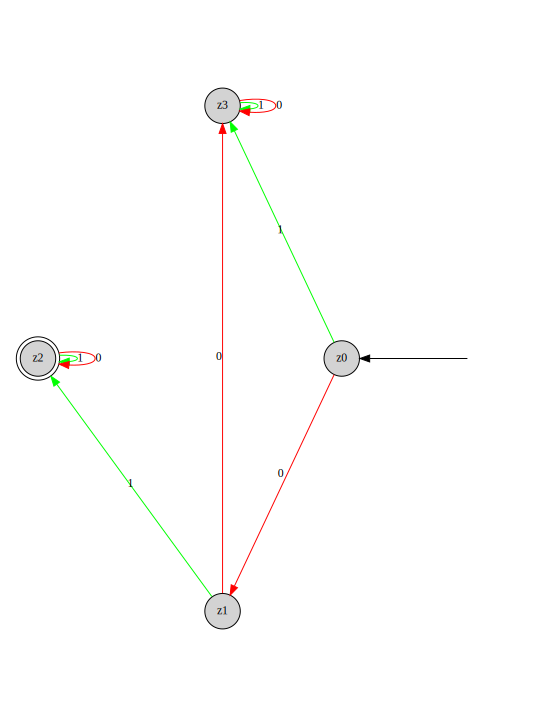

In [30]:
:dot custom_graph

# Conclusion

* ProB Jupyter notebooks allow conveniently working interactively with B
* Usable standalone or with existing models
* Applications: development, documentation, teaching
* Jupyter Notebook makes it easy to integrate new languages/tools in notebooks
* The Jupyter ecosystem provides a standard file format and useful tools (`nbconvert`, `nbgrader`, ...)

### Links

Load this notebook in your browser: https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.cs.uni-duesseldorf.de%2Fgeneral%2Fstups%2Fprob2-jupyter-kernel.git/master?filepath=notebooks%2Fpresentations%2FABZ%202021.ipynb

Download and install locally: https://gitlab.cs.uni-duesseldorf.de/general/stups/prob2-jupyter-kernel